In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
import numpy as np
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [4]:
%watermark -v -p pandas,seaborn,matplotlib

CPython 3.6.2
IPython 6.1.0

pandas 0.20.3
seaborn 0.8.0
matplotlib 2.0.2


In [10]:
flights = sns.load_dataset('flights')

years = [1949, 1955, 1960]
flights = flights.loc[flights.year.isin(years)]

In [14]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights.dtypes

year             int64
month         category
passengers       int64
dtype: object

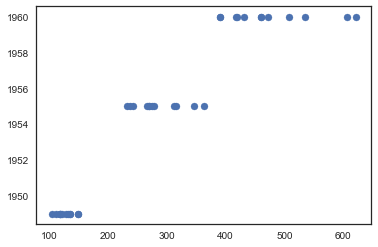

In [21]:
plt.scatter(x='passengers', y='year', data=flights)

In [98]:
def dumbell_plot(data, x, y, marker, marker_order=[], legend_loc=[], offset_divider=35,
                 fig_kwargs={}, marker_kwargs={}, legend=True, palette=None):
#                  text_h_align='right', palette='deep'):
    '''
    This is an example to create a dumbbell chart in Python.
    If you would like to provide your data and customize the graph, modify the variables in the section below.
    Please be aware that you need matplotlib installed in order for this to work.
    '''
    if not marker_order:
        marker_order = list(data[marker].unique())
    y_labels = list(data[y].unique())
    
    dummy_y = range(1, len(y_labels) + 1)
    
    if palette:
        colors = sns.color_palette(palette)
    else:
        colors = sns.color_palette()

    # Styles to be used when plotting the different elements of the graph.
#     dumbbell_style_a = dict(color=A_COLOR, linewidths=2,# mec=A_COLOR,
#                             marker='o', s=50)# markersize=9)
#     dumbbell_style_b = dict(color=B_COLOR, linewidths=2,# mec=B_COLOR,
#                             marker='o', s=50) #markersize=9)
#     axis_label_style = dict(horizontalalignment=text_h_align,
#                             verticalalignment='center', fontsize=10)
    
#     data = data.loc[:, years]
    min_data = data.min(axis=1)
    max_data = data.max(axis=1)

    # Create the figure
    fig, ax = plt.subplots(**fig_kwargs)

    index = range(len(y_labels))
    
    # Auto-set the state abbr text offset
    # The divider of 40 is based on the g/kWh figure max of 1185 and
    # offset of 30
    label_offset = data[x].max() / offset_divider
    
    
    for i, mark in enumerate(marker_order):
        x_vals = data.loc[data[marker] == mark, x]
        color = colors[i]
        plt.scatter(x_vals, dummy_y, zorder=2, c=color, **marker_kwargs)
        
        
    left_end = data.loc[data[marker] == marker_order[0], x].values
    right_end = data.loc[data[marker] == marker_order[-1], x].values
#     return left_end, right_end
    for label, y_val in zip(y_labels, dummy_y):
        plt.hlines(y_val, left_end[y_val-1], right_end[y_val-1], zorder=1)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.yticks(dummy_y, y_labels)
    
    
    
    
#     # Loop N times
#     for i, (data, year) in enumerate(zip(data.T.values, years)):
#         color = colors[i]
#         for value, label, j in zip(data, axis_labels, index):
#             facecolor = None
#             if label in rps_start and rps_start[label] <= year:
#                 facecolor = 'w'
            
#             ax.scatter(value, j, facecolors=facecolor, zorder=3, color=color,
#                       linewidth=2, s=50)
            
#             plt.hlines(y=j, xmin=min_data[j], xmax=max_data[j], zorder=2)
            
#             if i == 0:
#                 ax.text(min_data[j] - label_offset, j, label,
#                         **axis_label_style)

#     plt.yticks(index, ['' for x in axis_labels])

    if legend:
        legend_height = max(dummy_y) + 2
        
        for i, mark in enumerate(marker_order):
            ax.scatter(x=legend_loc[i], y=legend_height, color=colors[i], zorder=3,
                       **marker_kwargs)
            plt.text(x=legend_loc[i], y=legend_height+1, s=str(mark), ha='center')
        plt.hlines(y=legend_height, xmin=legend_loc[0], zorder=2, xmax=legend_loc[-1])

(0, 700)

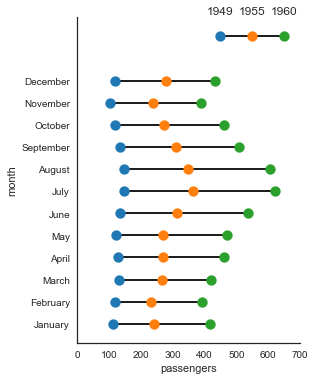

In [100]:
m_kwargs = {'s': 100}
fig_kwargs = {'figsize': (4, 6)}
dumbell_plot(flights, 'passengers', 'month', 'year', legend=True,
             legend_loc=[450, 550, 650], marker_kwargs=m_kwargs,
             fig_kwargs=fig_kwargs, palette='tab10')
sns.despine()
plt.xlim(0, 700)